**Project Title: Home Price Prediction Analysis**

Introduction:

* The aim of this project is to develop a robust home price prediction model that provides valuable insights into the factors influencing home prices in the United States. We will analyze historical data spanning from October 2002 to October 2022, excluding annual data for the year 2023. The goal is to understand the dynamics of the real estate market and create a model that can make informed predictions based on a comprehensive set of features.

Data Sources:

* S&P Case-Shiller Home Price Index (CSUSHPISA):
https://fred.stlouisfed.org/series/CSUSHPISA
Economic Indicators:

* Producer Price Index by Commodity: Final Demand: Final Demand Construction (PPIDCS) - https://fred.stlouisfed.org/series/PPIDCS
* Unemployment Rate (UNRATE) - https://fred.stlouisfed.org/series/UNRATE
* Producer Price Index by Commodity: Final Demand: Finished Goods Less Foods and Energy (WPSFD4131) - https://fred.stlouisfed.org/series/WPSFD4131
* Real Disposable Personal Income: Per Capita (A229RX0) - https://fred.stlouisfed.org/series/A229RX0
* Real Disposable Personal Income (DSPIC96) - https://fred.stlouisfed.org/series/DSPIC96
* Labor Force Participation Rate (CIVPART) - https://fred.stlouisfed.org/series/CIVPART
* Rail Freight Intermodal Traffic (RAILFRTINTERMODALD11) - https://fred.stlouisfed.org/series/RAILFRTINTERMODALD11
* Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL) - https://fred.stlouisfed.org/series/CPIAUCSL
* Monthly Supply of New Houses in the United States (MSACSR) - https://fred.stlouisfed.org/series/MSACSR
* Employment-Population Ratio (EMRATIO) - https://fred.stlouisfed.org/series/EMRATIO
* Working Age Population: Aged 15-64: All Persons for United States (LFWA64TTUSM647S) - https://fred.stlouisfed.org/series/LFWA64TTUSM647S


These data sources provide a comprehensive foundation for our analysis of home price prediction and its relationship with various economic indicators and housing market data.

### Data Preparation: Aggregating and Structuring

In this phase, we accumulate data from multiple sources, create Pandas dataframes, adjust column datatypes, and integrate quarterly data into our monthly dataset. This process ensures data compatibility for analysis.

* Data Accumulation: We gather data from various sources, including the S&P Case-Shiller Home Price Index and economic indicators.

* Data Collection: We read the data into Pandas dataframes for effective analysis.

* Column Datatype Adjustments: Columns are assigned appropriate data types for accurate modeling.

* Incorporating Quarterly Data: We align quarterly data with monthly data to understand market dynamics.

This phase lays the foundation for our analysis, ensuring accurate, structured data for our predictive model.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
import numpy as np
import os

In [2]:
# Reading cash shiller house price index in a dataframe
house_price = pd.read_csv("CSUSHPISA.csv")
house_price.head()

DATE  CSUSHPISA
0  1987-01-01     63.965
1  1987-02-01     64.424
2  1987-03-01     64.736
3  1987-04-01     65.132
4  1987-05-01     65.563

In [3]:
# changing data type of date column
house_price['DATE'] = pd.to_datetime(house_price['DATE'])

In [4]:
# Selecting data post oct 2002
house_price = house_price[house_price['DATE']>="2002-10-01"]

# Resetting index
house_price.reset_index(drop=True, inplace=True)
# making column names lowercase
house_price.columns = house_price.columns.str.lower()

In [5]:
# Creating "year" and "month" columns
house_price['year'] = pd.DatetimeIndex(house_price['date']).year
house_price['month'] = pd.DatetimeIndex(house_price['date']).month
house_price.sample()

date  csushpisa  year  month
194 2018-12-01    206.169  2018     12

### Reading Unemployment data

In [6]:
unemp = pd.read_csv('unemployment_rate.csv')
unemp.head()

DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8
2  1948-03-01     4.0
3  1948-04-01     3.9
4  1948-05-01     3.5

In [7]:
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
unemp = unemp[unemp['DATE']>="2002-10-01"]
unemp.rename(columns={'UNRATE': 'unemployemnt_rate'}, inplace=True)
unemp.columns = unemp.columns.str.lower()
# Resetting index
unemp.reset_index(drop=True, inplace=True)
unemp.tail()

date  unemployemnt_rate
247 2023-05-01                3.7
248 2023-06-01                3.6
249 2023-07-01                3.5
250 2023-08-01                3.8
251 2023-09-01                3.8

For quarterly data, we will impute for other months using linear interpolation after we create the final dataframe combining all the data.

In [8]:
# reading gdp per capita quarterly data
gdp = pd.read_csv('gdp_per_capita.csv')
gdp.rename(columns={'A939RC0Q052SBEA': 'gdp_quarterly'}, inplace=True)
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
gdp = gdp[gdp['DATE']>="2002-10-01"]
gdp.columns = gdp.columns.str.lower()
# Resetting index
gdp.reset_index(drop=True, inplace=True)
gdp.head()

date  gdp_quarterly
0 2002-10-01        38274.0
1 2003-01-01        38584.0
2 2003-04-01        38976.0
3 2003-07-01        39752.0
4 2003-10-01        40362.0

In [9]:
# reading real gdp per capita quarterly data
real_gdp = pd.read_csv('real_gdp_per_capita.csv')
real_gdp.rename(columns={'A939RX0Q048SBEA': 'real_gdp_quarterly'}, inplace=True)
real_gdp['DATE'] = pd.to_datetime(real_gdp['DATE'])
real_gdp = real_gdp[real_gdp['DATE']>="2002-10-01"]
real_gdp.columns = real_gdp.columns.str.lower()
# Resetting index
real_gdp.reset_index(drop=True, inplace=True)
real_gdp.head()

date  real_gdp_quarterly
0 2002-10-01             50302.0
1 2003-01-01             50462.0
2 2003-04-01             50796.0
3 2003-07-01             51512.0
4 2003-10-01             51986.0

In [10]:
# reading real gdp per capita monthly data
bbk_gdp = pd.read_csv('BBK_real_gdp_monthly.csv')
bbk_gdp['DATE'] = pd.to_datetime(bbk_gdp['DATE'])
bbk_gdp = bbk_gdp[bbk_gdp['DATE']>="2002-10-01"]
bbk_gdp.columns = bbk_gdp.columns.str.lower()
bbk_gdp.rename(columns={'bbkmgdp': 'gdp_per_capita'}, inplace=True)
# Resetting index
bbk_gdp.reset_index(drop=True, inplace=True)
bbk_gdp.head()

date  gdp_per_capita
0 2002-10-01       -0.333658
1 2002-11-01        1.639277
2 2002-12-01        0.726787
3 2003-01-01        3.110631
4 2003-02-01        1.902457

In [11]:
# Interest Rate data
fed_rate = pd.read_csv('FEDFUNDS.csv')
fed_rate['DATE'] = pd.to_datetime(fed_rate['DATE'])
fed_rate = fed_rate[fed_rate['DATE']>="2002-10-01"]
fed_rate.columns = fed_rate.columns.str.lower()
# Resetting index
fed_rate.reset_index(drop=True, inplace=True)
fed_rate.head()

date  fedfunds
0 2002-10-01      1.75
1 2002-11-01      1.34
2 2002-12-01      1.24
3 2003-01-01      1.24
4 2003-02-01      1.26

In [12]:
# construction materials price monthly
cons_price = pd.read_csv('construction_materials_price_index.csv')
cons_price['DATE'] = pd.to_datetime(cons_price['DATE'])
cons_price = cons_price[cons_price['DATE']>="2002-10-01"]
cons_price.columns = cons_price.columns.str.lower()
cons_price.rename(columns={'wpusi012011': 'cons_price'}, inplace=True)
# Resetting index
cons_price.reset_index(drop=True, inplace=True)
cons_price.head()

date  cons_price
0 2002-10-01       145.0
1 2002-11-01       144.6
2 2002-12-01       144.3
3 2003-01-01       144.4
4 2003-02-01       145.2

In [13]:
# consumer price index urban customers monthly
cpi_urban = pd.read_csv('consumer_price_index_urban_consumers_monthly.csv')
cpi_urban['DATE'] = pd.to_datetime(cpi_urban['DATE'])
cpi_urban = cpi_urban[cpi_urban['DATE']>="2002-10-01"]
cpi_urban.columns = cpi_urban.columns.str.lower()
cpi_urban.rename(columns={'cpiaucsl': 'cpi_urban'}, inplace=True)
# Resetting index
cpi_urban.reset_index(drop=True, inplace=True)
cpi_urban.head()

date  cpi_urban
0 2002-10-01      181.2
1 2002-11-01      181.5
2 2002-12-01      181.8
3 2003-01-01      182.6
4 2003-02-01      183.6

In [14]:
# total new privately owned housing units monthly
housing_units = pd.read_csv('total_new_privately_owned_housing_units.csv')
housing_units['DATE'] = pd.to_datetime(housing_units['DATE'])
housing_units = housing_units[housing_units['DATE']>="2002-10-01"]
housing_units.columns = housing_units.columns.str.lower()
housing_units.rename(columns={'computsa': 'new_pvt_owned_houses'}, inplace=True)
# Resetting index
housing_units.reset_index(drop=True, inplace=True)
housing_units.head()

date  new_pvt_owned_houses
0 2002-10-01                1601.0
1 2002-11-01                1718.0
2 2002-12-01                1671.0
3 2003-01-01                1654.0
4 2003-02-01                1688.0

In [15]:
# monthly supply of new houses
new_houses = pd.read_csv('monthly_supply_new_houses.csv')
new_houses['DATE'] = pd.to_datetime(new_houses['DATE'])
new_houses = new_houses[new_houses['DATE']>="2002-10-01"]
new_houses.columns = new_houses.columns.str.lower()
new_houses.rename(columns={'msacsr': 'mthly_supply_new_houses'}, inplace=True)
# Resetting index
new_houses.reset_index(drop=True, inplace=True)
new_houses.head()

date  mthly_supply_new_houses
0 2002-10-01                      4.0
1 2002-11-01                      4.0
2 2002-12-01                      4.0
3 2003-01-01                      4.0
4 2003-02-01                      4.5

In [16]:
# employment population ratio data
emp_pop_ratio = pd.read_csv('employment_population_ratio.csv')
emp_pop_ratio['DATE'] = pd.to_datetime(emp_pop_ratio['DATE'])
emp_pop_ratio = emp_pop_ratio[emp_pop_ratio['DATE']>="2002-10-01"]
emp_pop_ratio.columns = emp_pop_ratio.columns.str.lower()
emp_pop_ratio.rename(columns={'emratio': 'emp_pop_ratio'}, inplace=True)
# Resetting index
emp_pop_ratio.reset_index(drop=True, inplace=True)
emp_pop_ratio.head()

date  emp_pop_ratio
0 2002-10-01           62.7
1 2002-11-01           62.5
2 2002-12-01           62.4
3 2003-01-01           62.5
4 2003-02-01           62.5

In [17]:
# working age population 15 to 64 yrs
wkg_age_pop = pd.read_csv('working_age_population_15_64.csv')
wkg_age_pop['DATE'] = pd.to_datetime(wkg_age_pop['DATE'])
wkg_age_pop = wkg_age_pop[wkg_age_pop['DATE']>="2002-10-01"]
wkg_age_pop.rename(columns={'LFWA64TTUSM647S': 'wkg_age_pop'}, inplace=True)
wkg_age_pop.columns = wkg_age_pop.columns.str.lower()
# Resetting index
wkg_age_pop.reset_index(drop=True, inplace=True)
wkg_age_pop.head()

date   wkg_age_pop
0 2002-10-01  1.845542e+08
1 2002-11-01  1.847447e+08
2 2002-12-01  1.848593e+08
3 2003-01-01  1.856342e+08
4 2003-02-01  1.858686e+08

In [18]:
# Goverment subsisdies federal housing annual data
hou_subsidies = pd.read_csv('govt_subsidies_federal_housing_annual.csv')
hou_subsidies['DATE'] = pd.to_datetime(hou_subsidies['DATE'])
hou_subsidies = hou_subsidies[hou_subsidies['DATE']>="2002-01-01"]
hou_subsidies.rename(columns={'L312051A027NBEA': 'hou_subs_annual'}, inplace=True)
hou_subsidies.columns = hou_subsidies.columns.str.lower()
# Resetting index
hou_subsidies.reset_index(drop=True, inplace=True)
hou_subsidies.head()

date  hou_subs_annual
0 2002-01-01           24.183
1 2003-01-01           25.930
2 2004-01-01           27.201
3 2005-01-01           27.651
4 2006-01-01           28.604

In [19]:
# real disposable personal income
income = pd.read_csv('real_disposable_personal_income.csv')
income['DATE'] = pd.to_datetime(income['DATE'])
income = income[income['DATE']>="2002-10-01"]
income.rename(columns={'DSPIC96': 'disposable_pers_inc'}, inplace=True)
income.columns = income.columns.str.lower()
# Resetting index
income.reset_index(drop=True, inplace=True)
income.head()

date  disposable_pers_inc
0 2002-10-01              10661.8
1 2002-11-01              10690.9
2 2002-12-01              10719.9
3 2003-01-01              10710.4
4 2003-02-01              10674.0

In [20]:
# real disposable personal income per capita monthly
inc_per_capita = pd.read_csv('real_disposable_personal_income_per_capita_monthly.csv')
inc_per_capita['DATE'] = pd.to_datetime(inc_per_capita['DATE'])
inc_per_capita = inc_per_capita[inc_per_capita['DATE']>="2002-10-01"]
inc_per_capita.rename(columns={'A229RX0': 'pers_inc_per_capita'}, inplace=True)
inc_per_capita.columns = inc_per_capita.columns.str.lower()
# Resetting index
inc_per_capita.reset_index(drop=True, inplace=True)
inc_per_capita.head()

date  pers_inc_per_capita
0 2002-10-01              36918.0
1 2002-11-01              36991.0
2 2002-12-01              37066.0
3 2003-01-01              37007.0
4 2003-02-01              36857.0

In [21]:
# rail freight intermodal traffic data
rail_traffic = pd.read_csv('rail_freight_intermodal_traffic_usa.csv')
rail_traffic['DATE'] = pd.to_datetime(rail_traffic['DATE'])
rail_traffic = rail_traffic[rail_traffic['DATE']>="2002-10-01"]
rail_traffic.rename(columns={'RAILFRTINTERMODALD11': 'rail_traffic'}, inplace=True)
rail_traffic.columns = rail_traffic.columns.str.lower()
# Resetting index
rail_traffic.reset_index(drop=True, inplace=True)
rail_traffic.head()

date  rail_traffic
0 2002-10-01        721627
1 2002-11-01        791098
2 2002-12-01        786604
3 2003-01-01        807933
4 2003-02-01        815904

In [22]:
# Total Industrial Production Price Index monthly data
tip_index = pd.read_csv('industrial_prod_total_index_monthly.csv')
tip_index['DATE'] = pd.to_datetime(tip_index['DATE'])
tip_index = tip_index[tip_index['DATE']>="2002-10-01"]
tip_index.rename(columns={'INDPRO': 'total_inds_production_price_index'}, inplace=True)
tip_index.columns = tip_index.columns.str.lower()
# Resetting index
tip_index.reset_index(drop=True, inplace=True)
tip_index.head()

date  total_inds_production_price_index
0 2002-10-01                            90.4041
1 2002-11-01                            90.8985
2 2002-12-01                            90.3890
3 2003-01-01                            91.1355
4 2003-02-01                            91.2502

In [23]:
# commodity price index for producer monthly data
commodity_ppi = pd.read_csv('producer_price_index_commodity_monthly.csv')
commodity_ppi['DATE'] = pd.to_datetime(commodity_ppi['DATE'])
commodity_ppi = commodity_ppi[commodity_ppi['DATE']>="2002-10-01"]
commodity_ppi.rename(columns={'WPSFD4131': 'producer_commodity_ind'}, inplace=True)
commodity_ppi.columns = commodity_ppi.columns.str.lower()
# Resetting index
commodity_ppi.reset_index(drop=True, inplace=True)
commodity_ppi.head()

date  producer_commodity_ind
0 2002-10-01                   150.5
1 2002-11-01                   150.3
2 2002-12-01                   149.5
3 2003-01-01                   149.8
4 2003-02-01                   149.9

In [24]:
# labour force participation rate monthly data
labour_force = pd.read_csv('labour_force_participation_rate_monthly.csv')
labour_force['DATE'] = pd.to_datetime(labour_force['DATE'])
labour_force = labour_force[labour_force['DATE']>="2002-10-01"]
labour_force.rename(columns={'CIVPART': 'labour_force'}, inplace=True)
labour_force.columns = labour_force.columns.str.lower()
# Resetting index
labour_force.reset_index(drop=True, inplace=True)
labour_force.head()

date  labour_force
0 2002-10-01          66.6
1 2002-11-01          66.4
2 2002-12-01          66.3
3 2003-01-01          66.4
4 2003-02-01          66.4

In [25]:
# merging gdp quarterly data
df = pd.merge(house_price, gdp, how='left')
df_q = pd.merge(df, real_gdp, how='left')
df_q

date  csushpisa  year  month  gdp_quarterly  real_gdp_quarterly
0   2002-10-01    125.735  2002     10        38274.0             50302.0
1   2002-11-01    126.670  2002     11            NaN                 NaN
2   2002-12-01    127.624  2002     12            NaN                 NaN
3   2003-01-01    128.461  2003      1        38584.0             50462.0
4   2003-02-01    129.355  2003      2            NaN                 NaN
5   2003-03-01    130.148  2003      3            NaN                 NaN
6   2003-04-01    130.884  2003      4        38976.0             50796.0
7   2003-05-01    131.735  2003      5            NaN                 NaN
8   2003-06-01    132.649  2003      6            NaN                 NaN
9   2003-07-01    133.777  2003      7        39752.0             51512.0
10  2003-08-01    134.969  2003      8            NaN                 NaN
11  2003-09-01    136.294  2003      9            NaN                 NaN
12  2003-10-01    137.531  2003     10        40362.0             51986.0
13  2003-11-01    138.794  2003     11            NaN                 NaN
14  2003-12-01    140.179  2003     12            NaN                 NaN
15  2004-01-01    141.646  2004      1        40801.0             52179.0
16  2004-02-01    143.192  2004      2            NaN                 NaN
17  2004-03-01    145.059  2004      3            NaN                 NaN
18  2004-04-01    146.593  2004      4        41358.0             52469.0
19  2004-05-01    148.186  2004      5            NaN                 NaN
20  2004-06-01    149.850  2004      6            NaN                 NaN
21  2004-07-01    151.338  2004      7        41911.0             52835.0
22  2004-08-01    152.633  2004      8            NaN                 NaN
23  2004-09-01    154.179  2004      9            NaN                 NaN
24  2004-10-01    155.750  2004     10        42561.0             53242.0
25  2004-11-01    157.527  2004     11            NaN                 NaN
26  2004-12-01    159.330  2004     12            NaN                 NaN
27  2005-01-01    161.288  2005      1        43285.0             53719.0
28  2005-02-01    163.344  2005      2            NaN                 NaN
29  2005-03-01    165.812  2005      3            NaN                 NaN
30  2005-04-01    167.501  2005      4        43718.0             53868.0
31  2005-05-01    169.351  2005      5            NaN                 NaN
32  2005-06-01    171.190  2005      6            NaN                 NaN
33  2005-07-01    172.860  2005      7        44350.0             54153.0
34  2005-08-01    174.442  2005      8            NaN                 NaN
35  2005-09-01    176.438  2005      9            NaN                 NaN
36  2005-10-01    178.028  2005     10        44850.0             54317.0
37  2005-11-01    179.680  2005     11            NaN                 NaN
38  2005-12-01    180.910  2005     12            NaN                 NaN
39  2006-01-01    182.321  2006      1        45675.0             54927.0
40  2006-02-01    183.287  2006      2            NaN                 NaN
41  2006-03-01    184.364  2006      3            NaN                 NaN
42  2006-04-01    184.329  2006      4        46089.0             54945.0
43  2006-05-01    184.156  2006      5            NaN                 NaN
44  2006-06-01    183.507  2006      6            NaN                 NaN
45  2006-07-01    183.068  2006      7        46361.0             54886.0
46  2006-08-01    182.594  2006      8            NaN                 NaN
47  2006-09-01    182.798  2006      9            NaN                 NaN
48  2006-10-01    183.198  2006     10        46807.0             55216.0
49  2006-11-01    183.609  2006     11            NaN                 NaN
50  2006-12-01    184.139  2006     12            NaN                 NaN
51  2007-01-01    184.517  2007      1        47289.0             55260.0
52  2007-02-01    184.598  2007      2            NaN                 NaN
53  2007-03-01

In [26]:
# Concating monthly dataframes into one
df = pd.DataFrame()
df_bymonth = [df_q, unemp, bbk_gdp, fed_rate, cons_price, cpi_urban, housing_units,
              new_houses, emp_pop_ratio, wkg_age_pop, income, inc_per_capita, 
              rail_traffic, tip_index, commodity_ppi, labour_force]
for dfs in df_bymonth:
    dfs = dfs.set_index('date')
    df = pd.concat([df, dfs], axis=1)

In [27]:
df

csushpisa    year  month  gdp_quarterly  real_gdp_quarterly  \
date                                                                      
2002-10-01    125.735  2002.0   10.0        38274.0             50302.0   
2002-11-01    126.670  2002.0   11.0            NaN                 NaN   
2002-12-01    127.624  2002.0   12.0            NaN                 NaN   
2003-01-01    128.461  2003.0    1.0        38584.0             50462.0   
2003-02-01    129.355  2003.0    2.0            NaN                 NaN   
2003-03-01    130.148  2003.0    3.0            NaN                 NaN   
2003-04-01    130.884  2003.0    4.0        38976.0             50796.0   
2003-05-01    131.735  2003.0    5.0            NaN                 NaN   
2003-06-01    132.649  2003.0    6.0            NaN                 NaN   
2003-07-01    133.777  2003.0    7.0        39752.0             51512.0   
2003-08-01    134.969  2003.0    8.0            NaN                 NaN   
2003-09-01    136.294  2003.0    9.0            NaN                 NaN   
2003-10-01    137.531  2003.0   10.0        40362.0             51986.0   
2003-11-01    138.794  2003.0   11.0            NaN                 NaN   
2003-12-01    140.179  2003.0   12.0            NaN                 NaN   
2004-01-01    141.646  2004.0    1.0        40801.0             52179.0   
2004-02-01    143.192  2004.0    2.0            NaN                 NaN   
2004-03-01    145.059  2004.0    3.0            NaN                 NaN   
2004-04-01    146.593  2004.0    4.0        41358.0             52469.0   
2004-05-01    148.186  2004.0    5.0            NaN                 NaN   
2004-06-01    149.850  2004.0    6.0            NaN                 NaN   
2004-07-01    151.338  2004.0    7.0        41911.0             52835.0   
2004-08-01    152.633  2004.0    8.0            NaN                 NaN   
2004-09-01    154.179  2004.0    9.0            NaN                 NaN   
2004-10-01    155.750  2004.0   10.0        42561.0             53242.0   
2004-11-01    157.527  2004.0   11.0            NaN                 NaN   
2004-12-01    159.330  2004.0   12.0            NaN                 NaN   
2005-01-01    161.288  2005.0    1.0        43285.0             53719.0   
2005-02-01    163.344  2005.0    2.0            NaN                 NaN   
2005-03-01    165.812  2005.0    3.0            NaN                 NaN   
2005-04-01    167.501  2005.0    4.0        43718.0             53868.0   
2005-05-01    169.351  2005.0    5.0            NaN                 NaN   
2005-06-01    171.190  2005.0    6.0            NaN                 NaN   
2005-07-01    172.860  2005.0    7.0        44350.0             54153.0   
2005-08-01    174.442  2005.0    8.0            NaN                 NaN   
2005-09-01    176.438  2005.0    9.0            NaN                 NaN   
2005-10-01    178.028  2005.0   10.0        44850.0             54317.0   
2005-11-01    179.680  2005.0   11.0            NaN                 NaN   
2005-12-01    180.910  2005.0   12.0            NaN                 NaN   
2006-01-01    182.321  2006.0    1.0        45675.0             54927.0   
2006-02-01    183.287  2006.0    2.0            NaN                 NaN   
2006-03-01    184.364  2006.0    3.0            NaN                 NaN   
2006-04-01    184.329  2006.0    4.0        46089.0             54945.0   
2006-05-01    184.156  2006.0    5.0            NaN                 NaN   
2006-06-01    183.507  2006.0    6.0            NaN                 NaN   
2006-07-01    183.068  2006.0    7.0        46361.0             54886.0   
2006-08-01    182.594  2006.0    8.0            NaN                 NaN   
2006-09-01    182.798  2006.0    9.0            NaN                 NaN   
2006-10-01    183.198  2006.0   10.0        46807.0             55216.0   
2006-11-01    183.609  2006.0   11.0            NaN                 NaN   
2006-12-01    184.139  2006.0   12.0            NaN                 NaN   
2007-01-01    184.517  2007.0    1.0 

In [28]:
# Merging annual data
df_byyear = [hou_subsidies]
for dfs in df_byyear:
    if "year" not in dfs.columns:
        dfs['year'] = pd.DatetimeIndex(dfs['date']).year
        dfs.set_index('date', inplace=True)
        df = pd.merge(df, dfs, how='left', on='year')
    else:
        dfs.set_index('date', inplace=True)
        df = pd.merge(df, dfs, how='left', on='year')

In [29]:
df

csushpisa    year  month  gdp_quarterly  real_gdp_quarterly  \
0      125.735  2002.0   10.0        38274.0             50302.0   
1      126.670  2002.0   11.0            NaN                 NaN   
2      127.624  2002.0   12.0            NaN                 NaN   
3      128.461  2003.0    1.0        38584.0             50462.0   
4      129.355  2003.0    2.0            NaN                 NaN   
5      130.148  2003.0    3.0            NaN                 NaN   
6      130.884  2003.0    4.0        38976.0             50796.0   
7      131.735  2003.0    5.0            NaN                 NaN   
8      132.649  2003.0    6.0            NaN                 NaN   
9      133.777  2003.0    7.0        39752.0             51512.0   
10     134.969  2003.0    8.0            NaN                 NaN   
11     136.294  2003.0    9.0            NaN                 NaN   
12     137.531  2003.0   10.0        40362.0             51986.0   
13     138.794  2003.0   11.0            NaN                 NaN   
14     140.179  2003.0   12.0            NaN                 NaN   
15     141.646  2004.0    1.0        40801.0             52179.0   
16     143.192  2004.0    2.0            NaN                 NaN   
17     145.059  2004.0    3.0            NaN                 NaN   
18     146.593  2004.0    4.0        41358.0             52469.0   
19     148.186  2004.0    5.0            NaN                 NaN   
20     149.850  2004.0    6.0            NaN                 NaN   
21     151.338  2004.0    7.0        41911.0             52835.0   
22     152.633  2004.0    8.0            NaN                 NaN   
23     154.179  2004.0    9.0            NaN                 NaN   
24     155.750  2004.0   10.0        42561.0             53242.0   
25     157.527  2004.0   11.0            NaN                 NaN   
26     159.330  2004.0   12.0            NaN                 NaN   
27     161.288  2005.0    1.0        43285.0             53719.0   
28     163.344  2005.0    2.0            NaN                 NaN   
29     165.812  2005.0    3.0            NaN                 NaN   
30     167.501  2005.0    4.0        43718.0             53868.0   
31     169.351  2005.0    5.0            NaN                 NaN   
32     171.190  2005.0    6.0            NaN                 NaN   
33     172.860  2005.0    7.0        44350.0             54153.0   
34     174.442  2005.0    8.0            NaN                 NaN   
35     176.438  2005.0    9.0            NaN                 NaN   
36     178.028  2005.0   10.0        44850.0             54317.0   
37     179.680  2005.0   11.0            NaN                 NaN   
38     180.910  2005.0   12.0            NaN                 NaN   
39     182.321  2006.0    1.0        45675.0             54927.0   
40     183.287  2006.0    2.0            NaN                 NaN   
41     184.364  2006.0    3.0            NaN                 NaN   
42     184.329  2006.0    4.0        46089.0             54945.0   
43     184.156  2006.0    5.0            NaN                 NaN   
44     183.507  2006.0    6.0            NaN                 NaN   
45     183.068  2006.0    7.0        46361.0             54886.0   
46     182.594  2006.0    8.0            NaN                 NaN   
47     182.798  2006.0    9.0            NaN                 NaN   
48     183.198  2006.0   10.0        46807.0             55216.0   
49     183.609  2006.0   11.0            NaN                 NaN   
50     184.139  2006.0   12.0            NaN                 NaN   
51     184.517  2007.0    1.0        47289.0             55260.0   
52     184.598  2007.0    2.0            NaN                 NaN   
53     184.150  2007.0    3.0            NaN                 NaN   
54     183.010  2007.0    4.0        47802.0             55474.0   
55     181.600  2007.0    5.0            NaN                 NaN   
56     180.254  2007.0    6.0            NaN                 NaN   
57     179.111  2007.0    7.0        48216.0             5564

In [30]:
df['date'] = df_q['date']
# considering data till october 2022
df = df[df['date']<="2022-10-01"]
df.set_index('date', inplace=True)
df

csushpisa    year  month  gdp_quarterly  real_gdp_quarterly  \
date                                                                      
2002-10-01    125.735  2002.0   10.0        38274.0             50302.0   
2002-11-01    126.670  2002.0   11.0            NaN                 NaN   
2002-12-01    127.624  2002.0   12.0            NaN                 NaN   
2003-01-01    128.461  2003.0    1.0        38584.0             50462.0   
2003-02-01    129.355  2003.0    2.0            NaN                 NaN   
2003-03-01    130.148  2003.0    3.0            NaN                 NaN   
2003-04-01    130.884  2003.0    4.0        38976.0             50796.0   
2003-05-01    131.735  2003.0    5.0            NaN                 NaN   
2003-06-01    132.649  2003.0    6.0            NaN                 NaN   
2003-07-01    133.777  2003.0    7.0        39752.0             51512.0   
2003-08-01    134.969  2003.0    8.0            NaN                 NaN   
2003-09-01    136.294  2003.0    9.0            NaN                 NaN   
2003-10-01    137.531  2003.0   10.0        40362.0             51986.0   
2003-11-01    138.794  2003.0   11.0            NaN                 NaN   
2003-12-01    140.179  2003.0   12.0            NaN                 NaN   
2004-01-01    141.646  2004.0    1.0        40801.0             52179.0   
2004-02-01    143.192  2004.0    2.0            NaN                 NaN   
2004-03-01    145.059  2004.0    3.0            NaN                 NaN   
2004-04-01    146.593  2004.0    4.0        41358.0             52469.0   
2004-05-01    148.186  2004.0    5.0            NaN                 NaN   
2004-06-01    149.850  2004.0    6.0            NaN                 NaN   
2004-07-01    151.338  2004.0    7.0        41911.0             52835.0   
2004-08-01    152.633  2004.0    8.0            NaN                 NaN   
2004-09-01    154.179  2004.0    9.0            NaN                 NaN   
2004-10-01    155.750  2004.0   10.0        42561.0             53242.0   
2004-11-01    157.527  2004.0   11.0            NaN                 NaN   
2004-12-01    159.330  2004.0   12.0            NaN                 NaN   
2005-01-01    161.288  2005.0    1.0        43285.0             53719.0   
2005-02-01    163.344  2005.0    2.0            NaN                 NaN   
2005-03-01    165.812  2005.0    3.0            NaN                 NaN   
2005-04-01    167.501  2005.0    4.0        43718.0             53868.0   
2005-05-01    169.351  2005.0    5.0            NaN                 NaN   
2005-06-01    171.190  2005.0    6.0            NaN                 NaN   
2005-07-01    172.860  2005.0    7.0        44350.0             54153.0   
2005-08-01    174.442  2005.0    8.0            NaN                 NaN   
2005-09-01    176.438  2005.0    9.0            NaN                 NaN   
2005-10-01    178.028  2005.0   10.0        44850.0             54317.0   
2005-11-01    179.680  2005.0   11.0            NaN                 NaN   
2005-12-01    180.910  2005.0   12.0            NaN                 NaN   
2006-01-01    182.321  2006.0    1.0        45675.0             54927.0   
2006-02-01    183.287  2006.0    2.0            NaN                 NaN   
2006-03-01    184.364  2006.0    3.0            NaN                 NaN   
2006-04-01    184.329  2006.0    4.0        46089.0             54945.0   
2006-05-01    184.156  2006.0    5.0            NaN                 NaN   
2006-06-01    183.507  2006.0    6.0            NaN                 NaN   
2006-07-01    183.068  2006.0    7.0        46361.0             54886.0   
2006-08-01    182.594  2006.0    8.0            NaN                 NaN   
2006-09-01    182.798  2006.0    9.0            NaN                 NaN   
2006-10-01    183.198  2006.0   10.0        46807.0             55216.0   
2006-11-01    183.609  2006.0   11.0            NaN                 NaN   
2006-12-01    184.139  2006.0   12.0            NaN                 NaN   
2007-01-01    184.517  2007.0    1.0 

#### Data Handling: Addressing Missing Values

In our dataset, "gdp_quarterly" and "real_gdp_quarterly" contain missing values due to their quarterly nature. For other columns, missing values result from unavailability of fresh data.

* Handling Quarterly Data Missing Values:
We will address the missing values in "gdp_quarterly" and "real_gdp_quarterly" using linear interpolation. This method allows us to estimate the missing quarterly data points while preserving the time series pattern.

* Dealing with Missing Values in Other Columns:
Rows with missing values in columns other than "gdp_quarterly" and "real_gdp_quarterly" will be dropped from the dataset. This ensures that the data used for our analysis covers the period from October 2002 to October 2022.

This data handling approach prepares our dataset for subsequent analysis, maintaining the integrity of our timeframe and ensuring accurate insights into the factors influencing home prices.

In [31]:
# Filling missing values in "gdp_quarterly" and "real_gdp_quarterly" column using linear interpolation
df['gdp_quarterly'] = df['gdp_quarterly'].interpolate()
df['real_gdp_quarterly'] = df['real_gdp_quarterly'].interpolate()

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_53714/111317222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gdp_quarterly'] = df['gdp_quarterly'].interpolate()
/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_53714/111317222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_gdp_quarterly'] = df['real_gdp_quarterly'].interpolate()


### Data Visualization

In [32]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Time Series Analysis

#### Components of a Time-Series

**Trend -**
The trend component reveals the long-term direction of time series data. Trends can be increasing (upward), decreasing (downward), or stationary (horizontal).

**Seasonality -**
Seasonality exhibits a pattern that repeats concerning timing, direction, and magnitude. For example, increased water consumption during summer due to hot weather conditions reflects seasonality.

**Cyclical Component -**
Cyclical components are trends without a fixed repeating pattern. They represent periods of economic ups and downs, typically observed in business cycles. Cycles lack seasonal variation and typically occur over 3 to 12 years, depending on the nature of the time series.

**Irregular Variation -**
Irregular variations are fluctuations in time series data that become apparent when trend and cyclical components are removed. These variations are unpredictable, erratic, and may or may not follow a random pattern.

**ETS Decomposition -**
ETS Decomposition is a technique used to disentangle the various components of a time series. ETS stands for Error, Trend, and Seasonality. This method helps us better understand the underlying factors influencing the data.

In this analysis, we perform a time series analysis of house prices over time. By decomposing the time series into its components, we gain insights into trends, seasonality, and other variations that impact the housing market. This analysis allows us to make informed predictions and understand the dynamics of the real estate market.

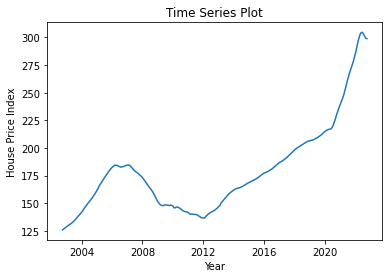

In [33]:
# Create a plot using the matplotlib library
plt.plot(df.index, df['csushpisa'], label='Time Series 1')

# Specify the time column as the x-axis and the value column as the y-axis
plt.xlabel('Year')
plt.ylabel('House Price Index')

# Add a title and axis labels to the plot as desired
plt.title('Time Series Plot')

# Display the plot using matplotlib library
plt.show()

Home Prices have been on upward trend over the years.

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

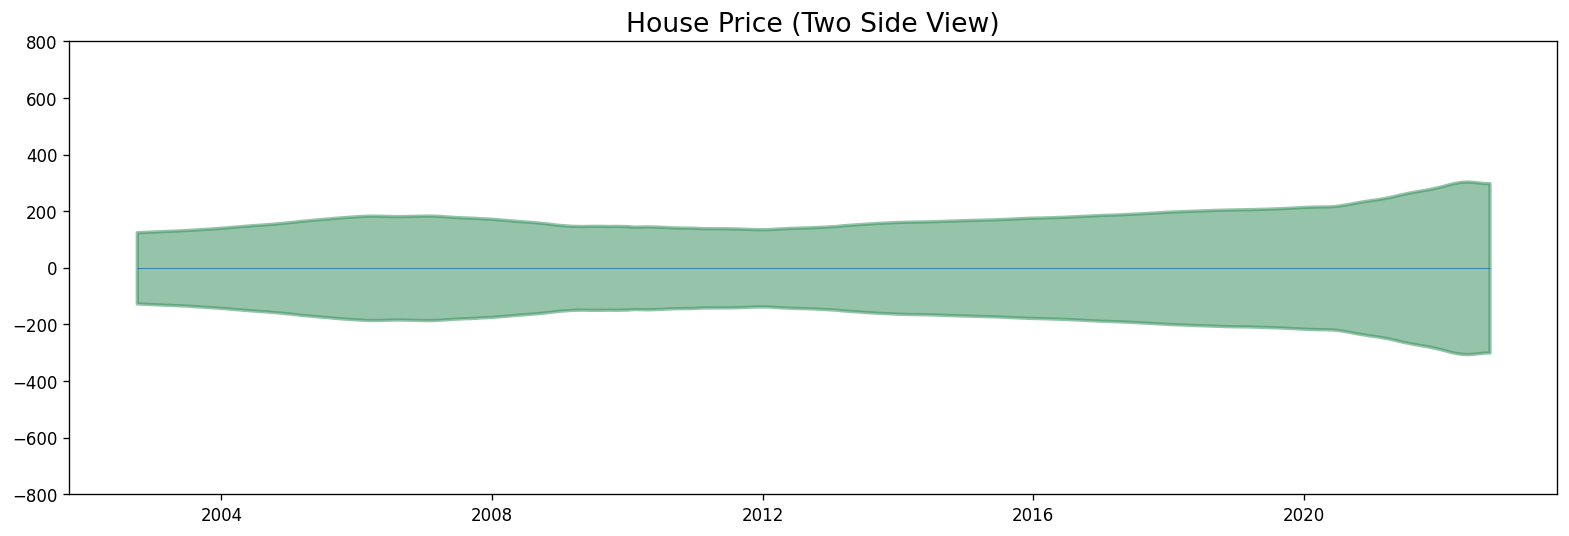

In [34]:
x = df.index.values
y1 = df['csushpisa'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('House Price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

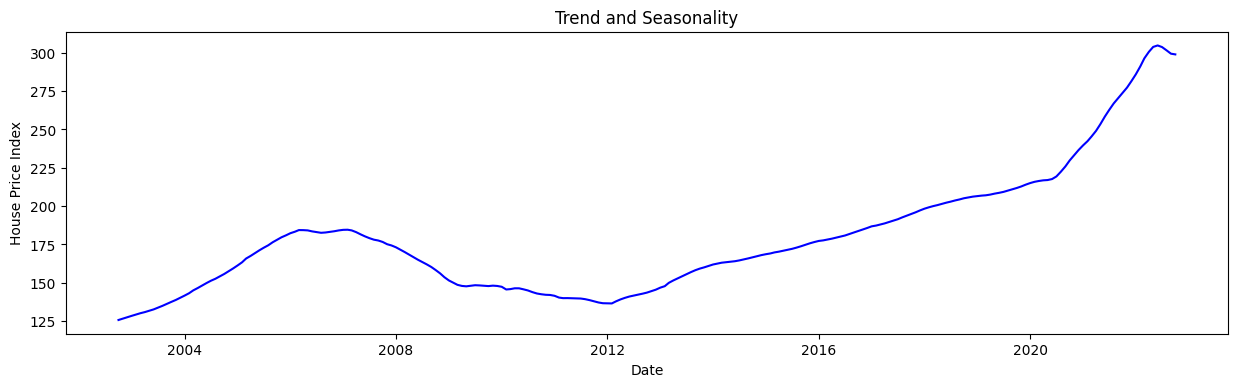

In [35]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='House Price Index', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df.index, y=df['csushpisa'], title='Trend and Seasonality')

#### Additive and Multiplicative Time Series
Time series data can exhibit different combinations of trends and seasonality. Depending on the nature of these components, a time series can be modeled as either an additive or multiplicative time series. In both cases, each observation in the series is expressed as a combination of its components.

Additive Time Series:
In an additive time series, each value is represented as the sum of its components:
Value = Base Level + Trend + Seasonality + Error

Multiplicative Time Series:
In a multiplicative time series, each value is represented as the product of its components:
Value = Base Level x Trend x Seasonality x Error

**Decomposition of a Time Series:**

Time series decomposition involves breaking down a series into its constituent elements. This can be done by considering the time series as an additive or multiplicative combination of the following components:

* Base Level
* Trend
* Seasonal Index
* Residual Term

The seasonal_decompose function in statsmodels provides a convenient way to perform this decomposition. It helps us understand the contributions of each component to the overall time series behavior, making it a valuable tool in time series analysis.

Understanding whether a time series is best modeled as additive or multiplicative is crucial for accurate analysis and prediction. This choice depends on the relationships between the components and the underlying nature of the data.

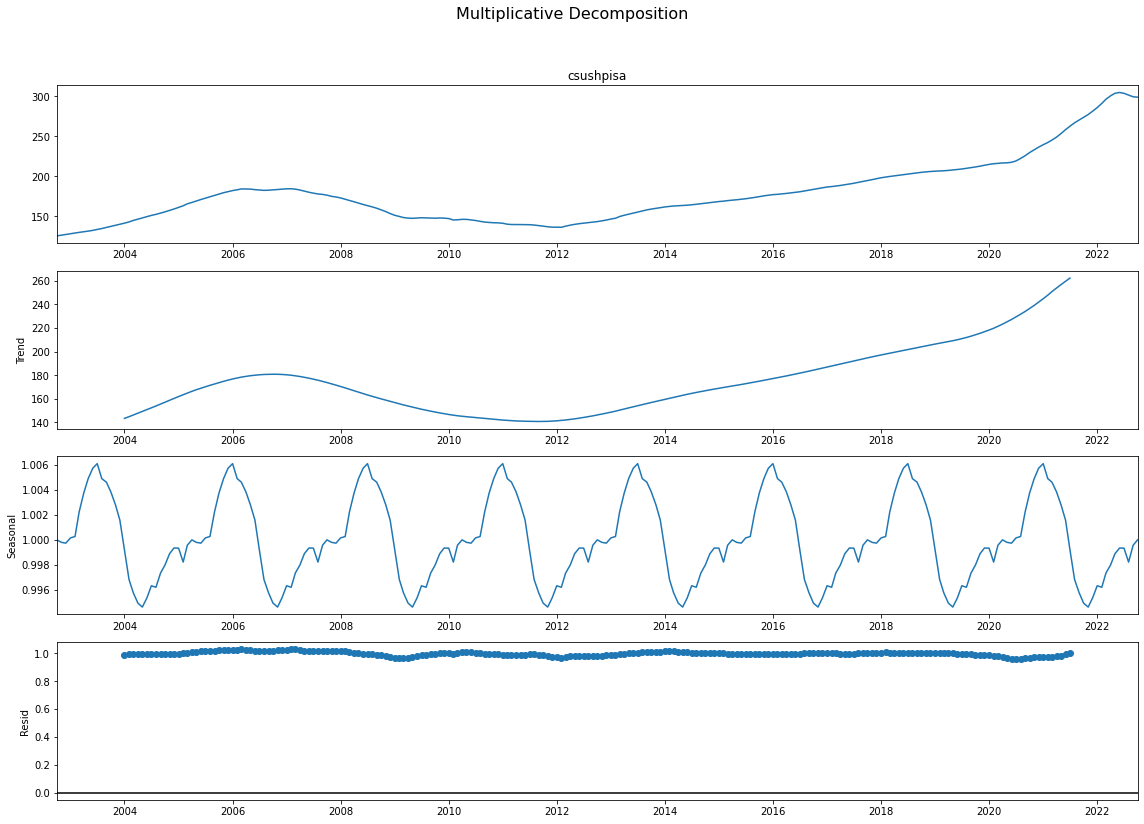

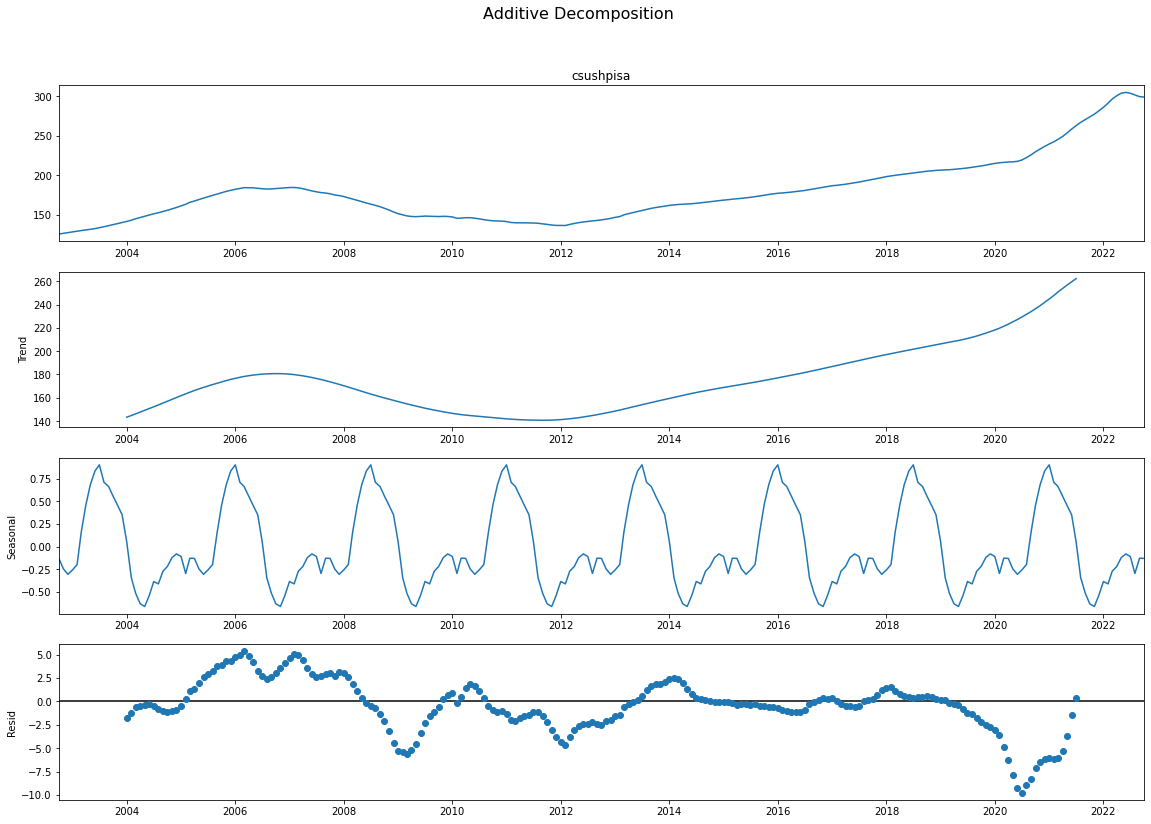

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['csushpisa'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['csushpisa'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

When closely examining the residuals of both the multiplicative and additive decompositions, it becomes apparent that they do not exhibit any discernible pattern.

The residuals from both decompositions appear to be fairly random, devoid of any noticeable structure. This is a positive sign in time series analysis, indicating that the decompositions have effectively removed the primary patterns and trends from the data.

In light of this observation, either the multiplicative or additive decomposition can be considered suitable for this particular time series. The choice between the two should be made based on the most meaningful and interpretable results for the specific analysis at hand.

This lack of residual patterns enhances the reliability and validity of our analysis, as it signifies that the decomposition has successfully captured the underlying trends and seasonality, leaving behind essentially random fluctuations in the data.

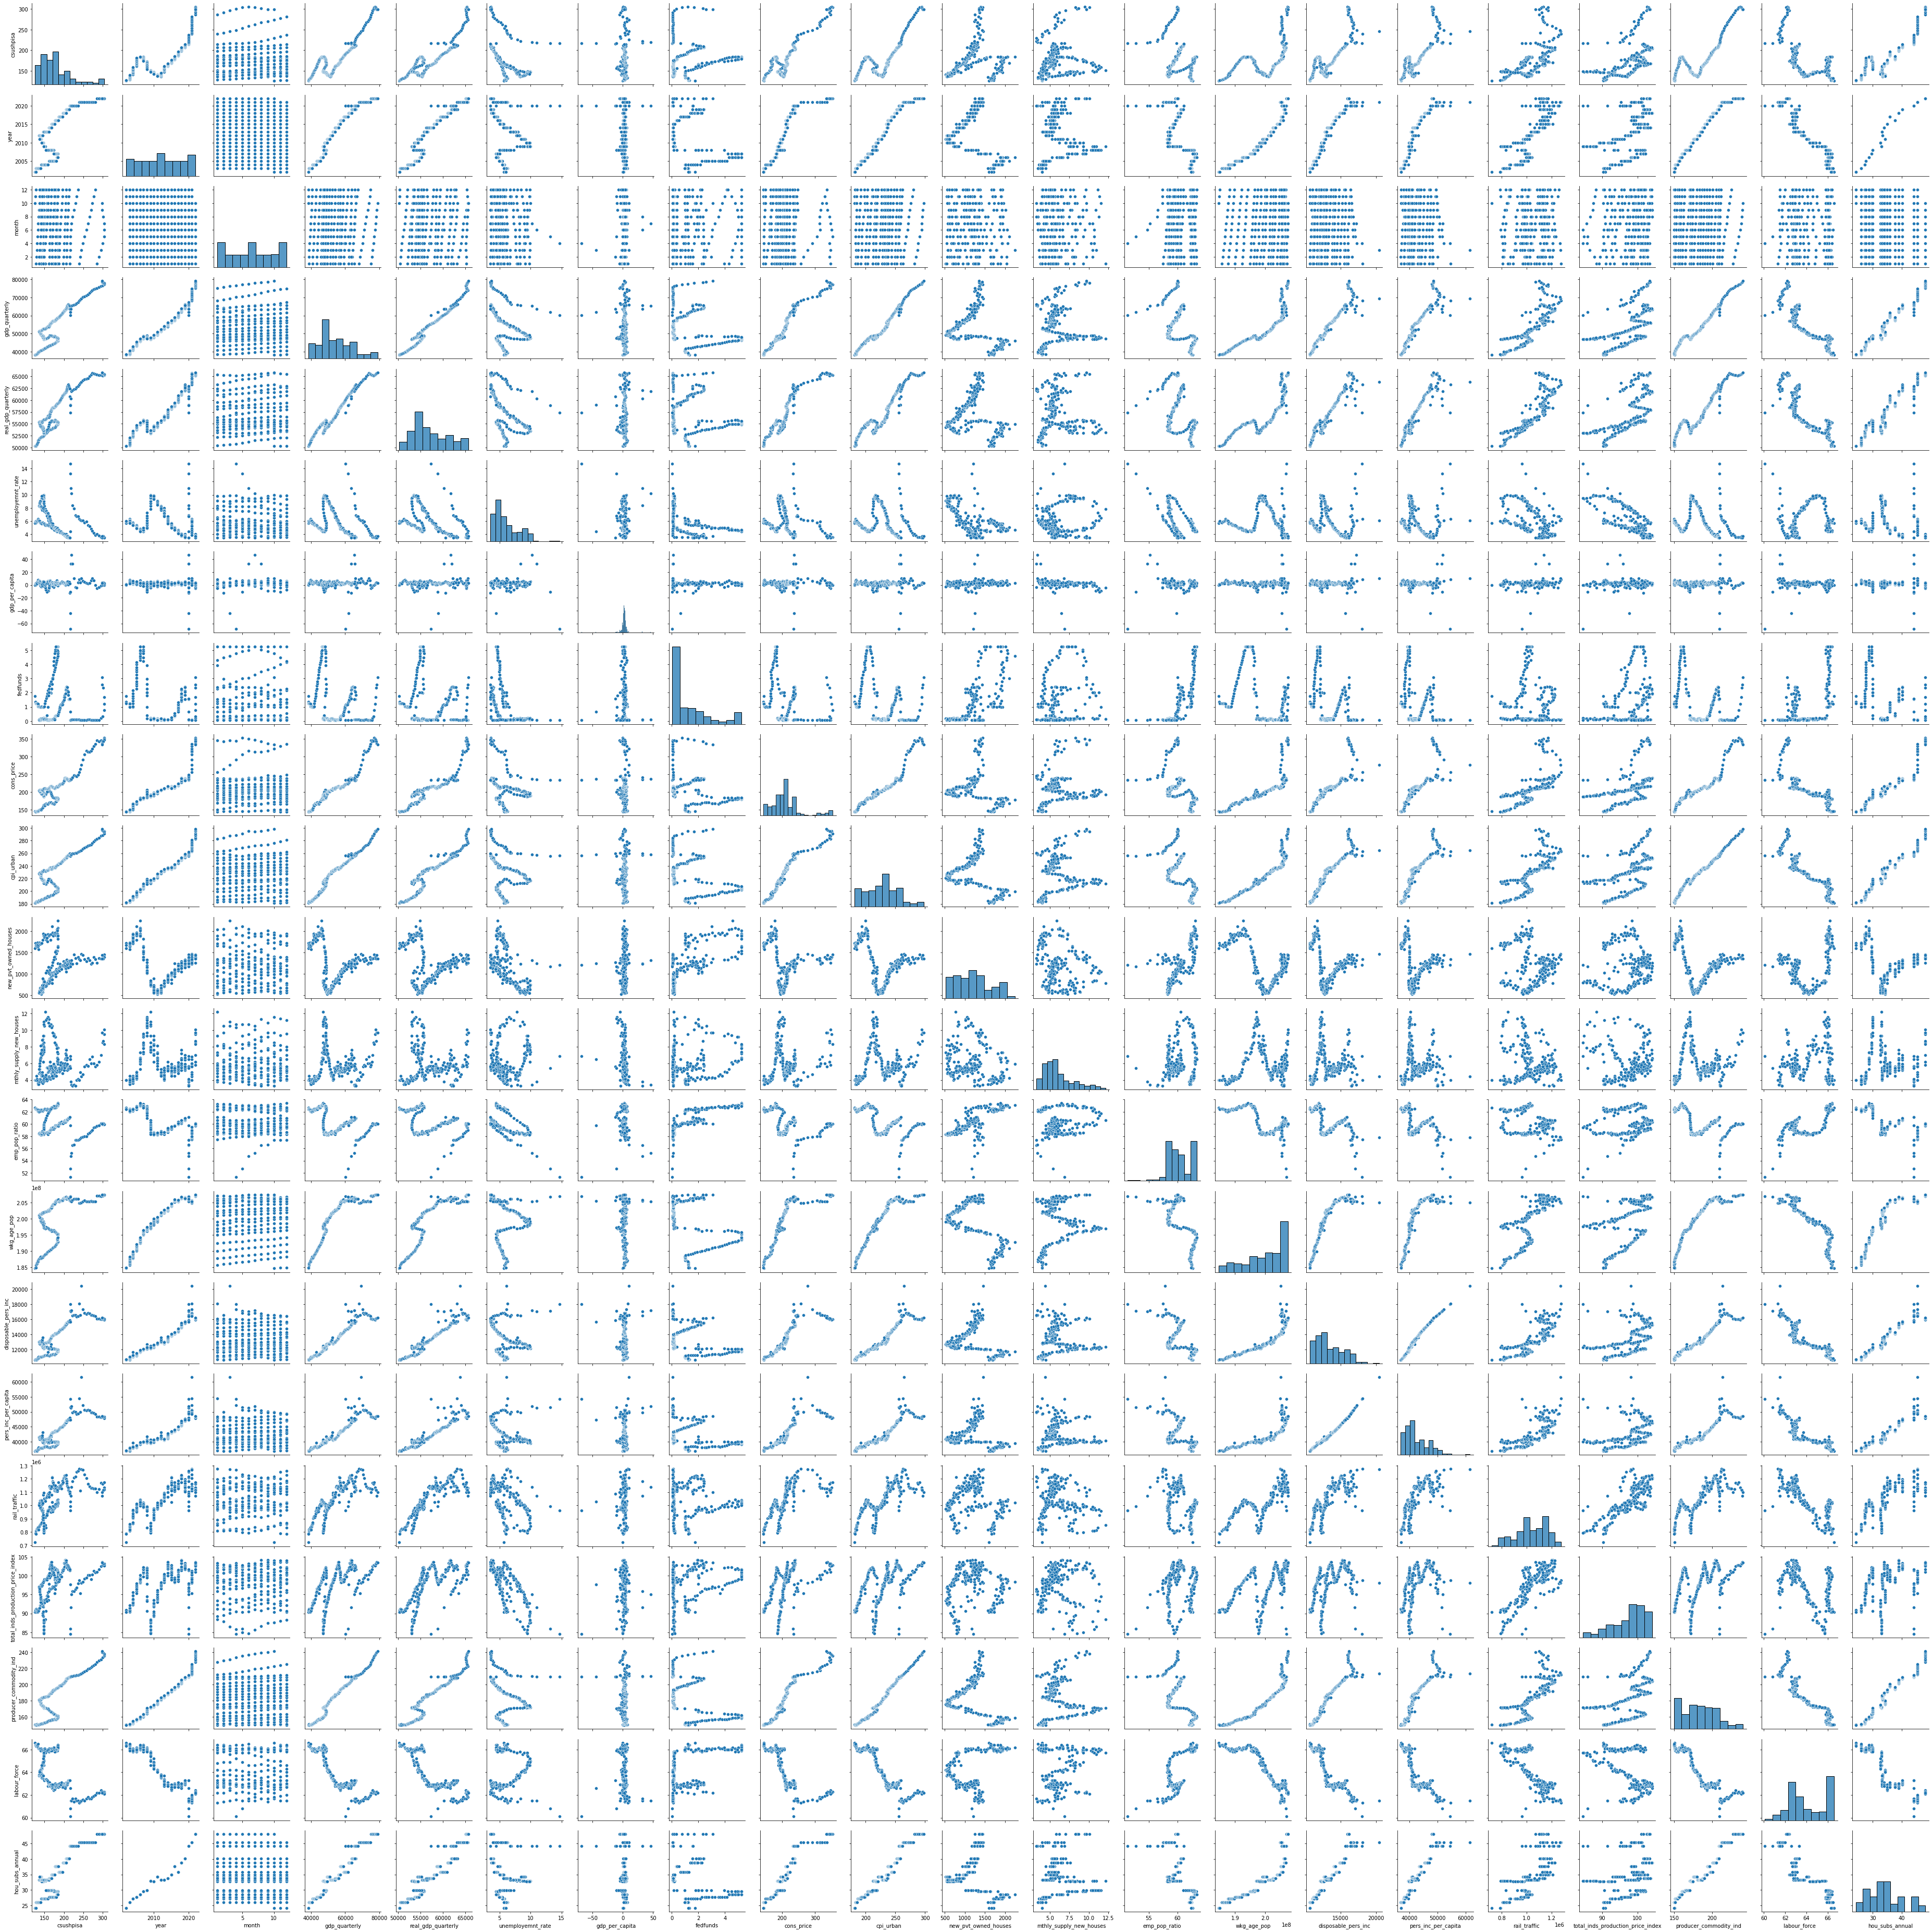

In [37]:
# Create a pair plot to visualize pairwise relationships and distributions between variables in the DataFrame
sns.pairplot(df)

**Visualizing the correlation between important columns and target variable**

<Figure size 720x576 with 0 Axes>

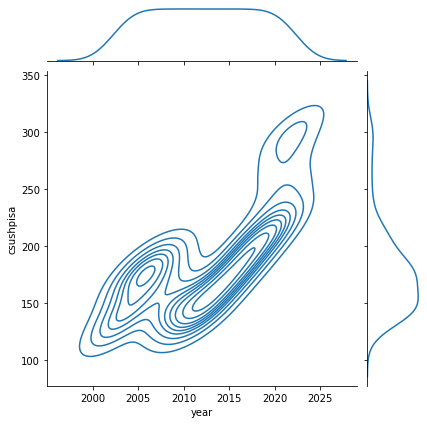

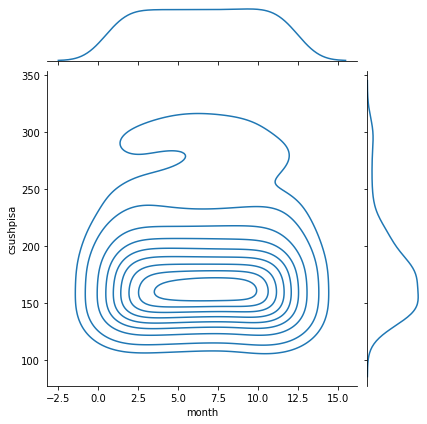

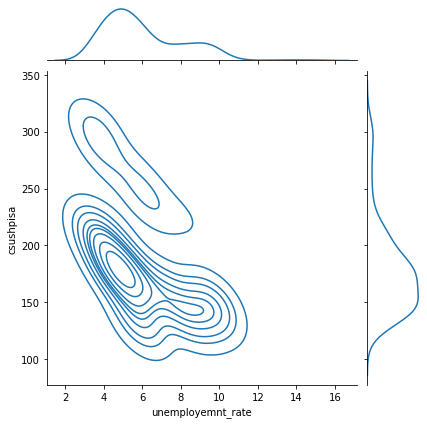

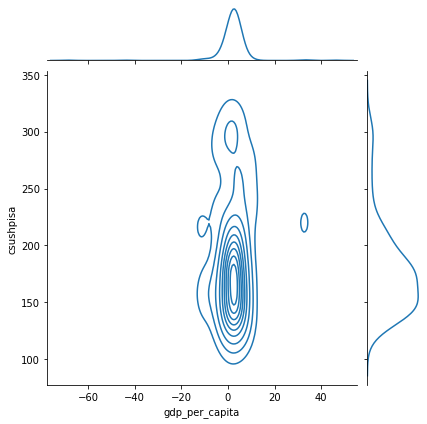

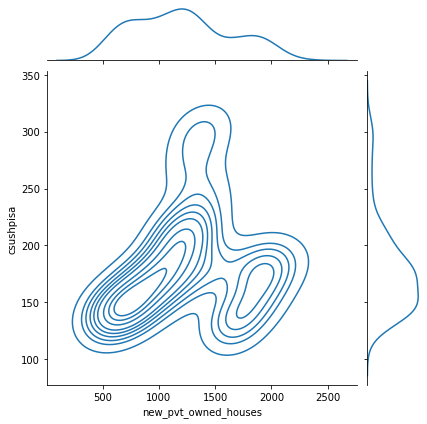

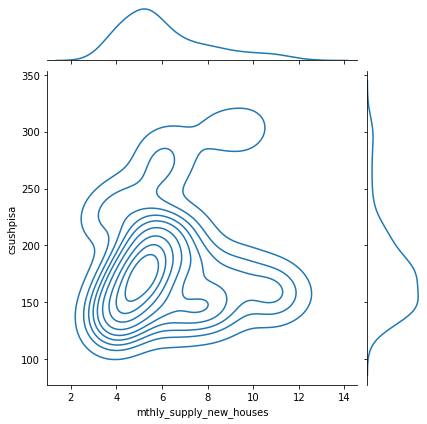

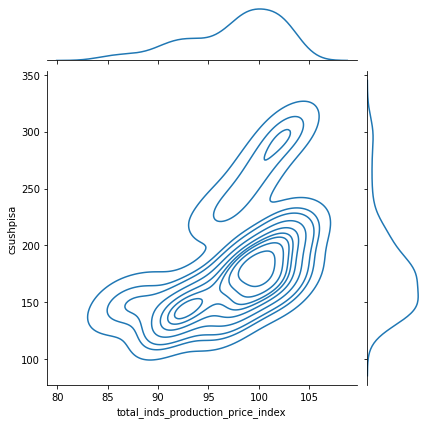

In [38]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["year"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["month"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["unemployemnt_rate"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["gdp_per_capita"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["new_pvt_owned_houses"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["mthly_supply_new_houses"], y=df["csushpisa"], kind="kde")
sns.jointplot(x=df["total_inds_production_price_index"], y=df["csushpisa"], kind="kde")
plt.show()

In [39]:
df.corr()

csushpisa      year     month  \
csushpisa                           1.000000  0.741881  0.002125   
year                                0.741881  1.000000 -0.048873   
month                               0.002125 -0.048873  1.000000   
gdp_quarterly                       0.874028  0.966415  0.009708   
real_gdp_quarterly                  0.893849  0.934337  0.018008   
unemployemnt_rate                  -0.490237 -0.188176 -0.012900   
gdp_per_capita                      0.006278 -0.008016  0.085995   
fedfunds                            0.096937 -0.390265  0.016290   
cons_price                          0.884411  0.879179 -0.007017   
cpi_urban                           0.796109  0.980051  0.005030   
new_pvt_owned_houses                0.240656 -0.355087  0.003290   
mthly_supply_new_houses             0.104957 -0.017738 -0.002792   
emp_pop_ratio                      -0.138468 -0.612995  0.005094   
wkg_age_pop                         0.577419  0.951393  0.003003   
disposable_pers_inc                 0.791923  0.958933 -0.014485   
pers_inc_per_capita                 0.805245  0.917322 -0.020572   
rail_traffic                        0.634665  0.814398  0.000300   
total_inds_production_price_index   0.519783  0.508019  0.020413   
producer_commodity_ind              0.797079  0.986020  0.000743   
labour_force                       -0.591107 -0.941705 -0.003662   
hou_subs_annual                     0.824903  0.959036 -0.055239   

                                   gdp_quarterly  real_gdp_quarterly  \
csushpisa                               0.874028            0.893849   
year                                    0.966415            0.934337   
month                                   0.009708            0.018008   
gdp_quarterly                           1.000000            0.982242   
real_gdp_quarterly                      0.982242            1.000000   
unemployemnt_rate                      -0.322871           -0.449755   
gdp_per_capita                          0.030233            0.079521   
fedfunds                               -0.249402           -0.126782   
cons_price                              0.951796            0.907524   
cpi_urban                               0.983749            0.939380   
new_pvt_owned_houses                   -0.193114           -0.067694   
mthly_supply_new_houses                 0.041163           -0.007420   
emp_pop_ratio                          -0.467929           -0.347865   
wkg_age_pop                             0.878845            0.837988   
disposable_pers_inc                     0.946032            0.930896   
pers_inc_per_capita                     0.917624            0.909516   
rail_traffic                            0.800727            0.847992   
total_inds_production_price_index       0.572257            0.651670   
producer_commodity_ind                  0.984838            0.943027   
labour_force                           -0.868935           -0.823042   
hou_subs_annual                         0.965215            0.921011   

                                   unemployemnt_rate  gdp_per_capita  \
csushpisa                                  -0.490237        0.006278   
year                                       -0.188176       -0.008016   
month                                      -0.012900        0.085995   
gdp_quarterly                              -0.322871        0.030233   
real_gdp_quarterly                         -0.449755        0.079521   
unemployemnt_rate                           1.000000       -0.074264   
gdp_per_capita                             -0.074264        1.000000   
fedfunds                                   -0.505826        0.001643   
cons_price                                 -0.246686       -0.010175   
cpi_urban                                  -0.197874       -0.013520   
new_pvt_owned_houses                       -0.556993        0.063136   
mthly_supply_new_houses                     0.078946       -0.257386   
emp_pop_ratio    

In [40]:
# Import necessary libraries and perform data splitting
from sklearn.model_selection import train_test_split

# Separating the target variable 'csushpisa' and the independent variables
y = df.pop('csushpisa')  # 'y' contains the target variable
X = df  # 'X' contains the independent variables

# Split the data into training and testing sets
X_train = X[:-12]  # Training data (excluding the last 12 months)
X_test = X[-12:]  # Testing data (last 12 months)
y_train = y[:-12]  # Corresponding target values for training data
y_test = y[-12:]  # Corresponding target values for testing data

# Display the shapes of the training and testing datasets
X_train.shape, X_test.shape

((229, 20), (12, 20))

In [41]:
# let's explore a few examples in which variables have only a few
# categories say less than 3

for col in X_train.columns:
    if X_train[col].dtypes == 'object':
        if X_train[col].nunique() < 3:
            print(X_train.groupby(col)[col].count()/len(X_train))

In [42]:
# variables with high cardinality

multi_cat_cols = []

for col in X_train.columns:
    if X_train[col].dtypes == 'object':
        if X_train[col].nunique() > 10:
            multi_cat_cols.append(col)
            print(X_train.groupby(col)[col].count()/len(X_train))

As none of the categorical column contain rare categories. So we don't have to rare encode the categorical columns.

We can treat year and month as categorical variable and do its target guided encoding.

In [43]:
# count encoding

def categorical_to_counts(df_train, df_test):
    
    df_train_temp = df_train.copy()
    df_test_temp = df_test.copy()
    
    for col in ['month']:
        
        # dictionary mapping category to counts
        counts_map = df_train_temp[col].value_counts().to_dict()
        
        # remap the labels to their counts
        df_train_temp[col+'_count'] = df_train_temp[col].map(counts_map)
        df_test_temp[col+'_count'] = df_test_temp[col].map(counts_map)
        
    return df_train_temp, df_test_temp

X_train_count, X_test_count = categorical_to_counts(X_train, X_test)
X_train_count.shape, X_test_count.shape

((229, 21), (12, 21))

**Target-Guided Encoding** is a method to convert categorical variables into numerical values by considering their relationship with the target variable. It's useful for capturing dependencies in the data.

**Subtypes:**

1. **Ordered Integer Encoding:** Assigns integers based on category ranking, suitable for ordinal features.
2. **Mean Encoding:** Assigns values based on the mean of the target variable for each category, useful for nominal features.

In [44]:
# ordered integer encoding

def categories_to_ordered(df_train, df_test, y_train, y_test):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['month']:
        
        # order categories according to target mean
        ordered_labels = df_train_temp.groupby(
         [col])['csushpisa'].mean().sort_values().index
        
        # dictionary to map ordered labels to ordinal number
        ordinal_label = {k: i for i, k in enumerate(
           ordered_labels, 0)}
        
        # remap the categories to these ordinal numbers
        df_train_temp[col+'_ordinal'] = df_train[col].map(ordinal_label)
        df_test_temp[col+'_ordinal'] = df_test[col].map(ordinal_label)
        
    # remove the target
    df_train_temp.drop(['csushpisa'], axis=1, inplace=True)
    df_test_temp.drop(['csushpisa'], axis=1, inplace=True)
    
    return df_train_temp, df_test_temp

X_train_ordered, X_test_ordered = categories_to_ordered(
     X_train_count, X_test_count, y_train, y_test)

X_train_ordered.shape, X_test_ordered.shape

((229, 22), (12, 22))

In [45]:
# mean encoding

def categories_to_mean(df_train, df_test, y_train, y_test):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['month']:
        
        ordered_labels = df_train_temp.groupby(
          [col])['csushpisa'].mean().to_dict()
        
        # remap the categories to target mean
        df_train_temp[col+'_mean_encoding'] = df_train[col].map(
            ordered_labels)
        df_test_temp[col+'_mean_encoding'] = df_test[col].map(
            ordered_labels)
        
    
    # remove target
    df_train_temp.drop(columns = ['csushpisa'], inplace=True)
    df_test_temp.drop(columns=['csushpisa'], inplace=True)
    
    return df_train_temp, df_test_temp


X_train_mean, X_test_mean = categories_to_mean(
    X_train_ordered, X_test_ordered, y_train, y_test)

X_train_mean.shape, X_test_mean.shape

((229, 23), (12, 23))

### Feature Selection

Feature Selection is the process of choosing the most relevant features for a machine learning model.

**Key Aspects:**

* Remove Constant Features: Eliminate those with the same value for all data points.

* Remove Quasi-Constant Features: Discard features with minimal variation.

* Correlation Analysis: Address high correlation between features to avoid redundancy.

* Multicollinearity Management: Manage highly correlated features to improve model stability.

In [46]:
# remove constant and quasi constant features

quasi_constant_feat = []

for feature in X_train_mean.columns:
    
    predominant = (X_train_mean[feature].value_counts()/np.float(
       len(X_train_mean))).sort_values(ascending=False).values[0]
    
    if predominant > 0.998:
        quasi_constant_feat.append(feature)
        
X_train_mean.drop(columns=quasi_constant_feat, inplace=True)
X_test_mean.drop(columns=quasi_constant_feat, inplace=True)

/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_53714/1409303371.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predominant = (X_train_mean[feature].value_counts()/np.float(
/var/folders/6s/cwm9vzc106nd6dl62shcqh080000gn/T/ipykernel_53714/1409303371.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predominant = (X_train

In [47]:
# remove duplicated features

duplicated_feat = []
for i in range(0, len(X_train_mean.columns)):
    col_1 = X_train_mean.columns[i]
    for col_2 in X_train_mean.columns[i+1:]:
        if X_train_mean[col_1].equals(X_train_mean[col_2]):
            duplicated_feat.append(col_2)
            
X_train_mean.drop(columns=duplicated_feat, inplace=True)
X_test_mean.drop(columns=duplicated_feat, inplace=True)
X_train_mean.shape, X_test_mean.shape

((229, 23), (12, 23))

In [48]:
X_train = X_train_mean.copy()
X_test = X_test_mean.copy()

In [49]:
# remove correlated features to reduce the feature space

def correlation(dataset, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train,0.8)
print('Number of correlated features: ', len(set(corr_features)))

X_train = X_train.drop(columns=corr_features)
X_test = X_test.drop(columns=corr_features)

X_train.shape, X_test.shape

Number of correlated features:  12


((229, 11), (12, 11))

In [50]:
# remove multicollinear features
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def multicollinear_feats(X, thresh=5.0):
    X = X.assign(const=1)  # faster than add_constant from statsmodels
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        vif = vif[:-1]  # don't let the constant be removed in the loop.
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            del variables[maxloc]
            dropped = True

    return set(set(X.columns).difference(set(X.columns[variables[:-1]])))

multi_corr_features = multicollinear_feats(X_train)
multi_corr_features = [col for col in multi_corr_features if col in X_train.columns]
print(multi_corr_features)

['emp_pop_ratio', 'new_pvt_owned_houses']


In [51]:
X_train = X_train.drop(columns=multi_corr_features)
X_test = X_test.drop(columns=multi_corr_features)

X_train.shape, X_test.shape

((229, 9), (12, 9))

In [52]:
cols = X_train.columns

In [53]:
# Scaling
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns = cols)

### Models

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor
np.random.seed(42)

In [56]:
def predict(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('R2 score: ', r2_score(y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("mean_absolute_error: ", mean_absolute_error(y_test, y_pred))
    return y_pred

**Linear Regression**

In [57]:
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)

print("Training set performnace: ")
y_train_pred_lr = predict(lr_model, X_train, y_train)
print("\n")
print("Test set performnace: ")
y_test_pred_lr = predict(lr_model, X_test, y_test)
print('\n')
#Printing the regression coefficients of different variables
coefs = lr_model.coef_
cols = X_train.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")
print('\n')    
# The intercept
print("The intercept is: ", lr_model.intercept_)

Training set performnace: 
R2 score:  0.8205192695685132
RMSE:  12.992676154331495
mean_absolute_error:  9.73003016306986


Test set performnace: 
R2 score:  -58.19291916228664
RMSE:  68.64247590336078
mean_absolute_error:  67.78359671534638


The coefficient for year is 119.62561823544583
The coefficient for month is 6.09578778977702
The coefficient for unemployemnt_rate is -50.27882996787423
The coefficient for gdp_per_capita is 20.275738672318578
The coefficient for fedfunds is 61.95126266020813
The coefficient for mthly_supply_new_houses is -6.925064859767435
The coefficient for total_inds_production_price_index is -56.305139060595565
The coefficient for month_count is 0.22816945773469754
The coefficient for month_ordinal is 1.8380324894546822


The intercept is:  130.67053229774444


**Analyzing Coefficients in the Linear Regression Model**

In a linear regression model, the coefficients represent the influence of each feature on the predicted target variable, in this case, likely home prices in the United States. Let's delve into the analysis of the coefficients:

**Year (Coefficient: 119.625):**

The positive coefficient for 'year' indicates a strong positive relationship with home prices. For each year increase, the model predicts an increase of approximately 119.63 units in home prices. This suggests that over time, home prices have experienced a substantial upward trend.

**Month (Coefficient: 6.095):**

The positive coefficient for 'month' suggests that there is a positive relationship between the month of the year and home prices. Each month's increase leads to an approximate 6.10 unit increase in home prices. It implies some degree of seasonality in housing prices.

**Unemployment Rate (Coefficient: -50.278):**

The negative coefficient for the 'unemployment_rate' variable implies that as the unemployment rate increases, home prices tend to decrease. A one-unit increase in the unemployment rate results in a decrease of approximately 50.28 units in home prices. This aligns with economic expectations, as a higher unemployment rate can reduce housing demand and put downward pressure on prices.

**GDP per Capita (Coefficient: 20.275):**

A positive coefficient for 'gdp_per_capita' signifies that a higher GDP per capita is associated with higher home prices. Each unit increase in GDP per capita leads to an increase of about 20.28 units in home prices. This suggests that economic prosperity positively influences the housing market.

**Federal Funds Rate (Coefficient: 61.951):**

The positive coefficient for 'fedfunds' suggests that a higher federal funds rate corresponds to higher home prices. An increase of one unit in the federal funds rate results in an increase of approximately 61.95 units in home prices. This relationship might be influenced by broader economic trends and lending rates.

**Monthly Supply of New Houses (Coefficient: -6.925):**

The negative coefficient for 'mthly_supply_new_houses' indicates that a greater monthly supply of new houses is associated with lower home prices. An increase of one unit in the monthly supply leads to a decrease of about 6.93 units in home prices. It underscores the importance of supply and demand dynamics in the housing market.

**Total Industrial Production Price Index (Coefficient: -56.305):**

The negative coefficient for the 'total_inds_production_price_index' suggests that a higher industrial production price index is associated with lower home prices. Each unit increase in this index results in a decrease of approximately 56.31 units in home prices. It reflects the influence of economic factors on housing prices.

**Month Count (Coefficient: 0.228):**

The positive coefficient for 'month_count' indicates a slight positive relationship with home prices as the count of months increases. However, the effect is relatively small compared to other features.

**Month Ordinal (Coefficient: 1.838):**

The positive coefficient for 'month_ordinal' suggests a positive relationship with home prices as the ordinal value of the month increases. It indicates some seasonality in housing prices.

**Intercept (Intercept: 130.67):**
The intercept represents the base value of home prices when all other features are set to zero. In this case, it's approximately 130.67. This value provides a starting point for home prices, but it's essential to remember that in practice, all the listed factors collectively influence actual home prices.

In conclusion, the coefficients in your linear regression model offer valuable insights into the factors impacting home prices. These findings can be used to make informed decisions in the real estate market and gain a deeper understanding of the interplay between economic indicators, housing supply and demand, and the temporal aspects of housing pricing trends.

In [58]:
y_test = pd.DataFrame(y_test)
y_test

csushpisa
date                 
2021-11-01    277.251
2021-12-01    281.393
2022-01-01    285.921
2022-02-01    291.090
2022-03-01    296.353
2022-04-01    300.550
2022-05-01    303.796
2022-06-01    304.755
2022-07-01    303.714
2022-08-01    301.596
2022-09-01    299.380
2022-10-01    298.922

In [59]:
y_test_pred_lr = pd.DataFrame(data=y_test_pred_lr, 
                columns=['predicted_csushpisa'])
y_test_pred_lr.index = y_test.index
y_test_pred_lr.to_csv('test_results.csv', index=False)
y_test_pred_lr

predicted_csushpisa
date                           
2021-11-01           216.433806
2021-12-01           218.367281
2022-01-01           216.868320
2022-02-01           216.620202
2022-03-01           217.215867
2022-04-01           217.475628
2022-05-01           223.701959
2022-06-01           229.189959
2022-07-01           234.720928
2022-08-01           243.193530
2022-09-01           245.915540
2022-10-01           251.614819

Comparing actual and predicted values by looking them side by side.

In [60]:
test_data = pd.concat([y_test, y_test_pred_lr], axis=1)
test_data

csushpisa  predicted_csushpisa
date                                      
2021-11-01    277.251           216.433806
2021-12-01    281.393           218.367281
2022-01-01    285.921           216.868320
2022-02-01    291.090           216.620202
2022-03-01    296.353           217.215867
2022-04-01    300.550           217.475628
2022-05-01    303.796           223.701959
2022-06-01    304.755           229.189959
2022-07-01    303.714           234.720928
2022-08-01    301.596           243.193530
2022-09-01    299.380           245.915540
2022-10-01    298.922           251.614819

/Users/dhanyabahadur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/dhanyabahadur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


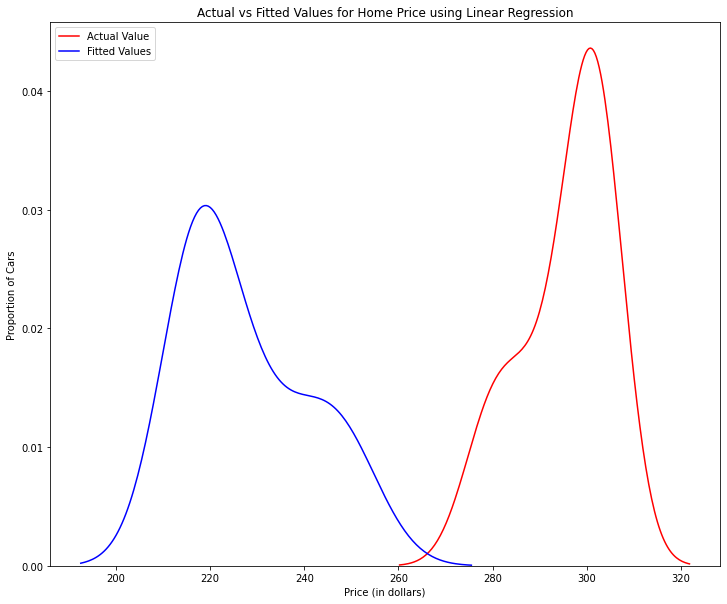

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred_lr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Home Price using Linear Regression')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend(loc="upper left")
plt.show()
plt.close()

For High Values the predicted values are not correctly predicted.

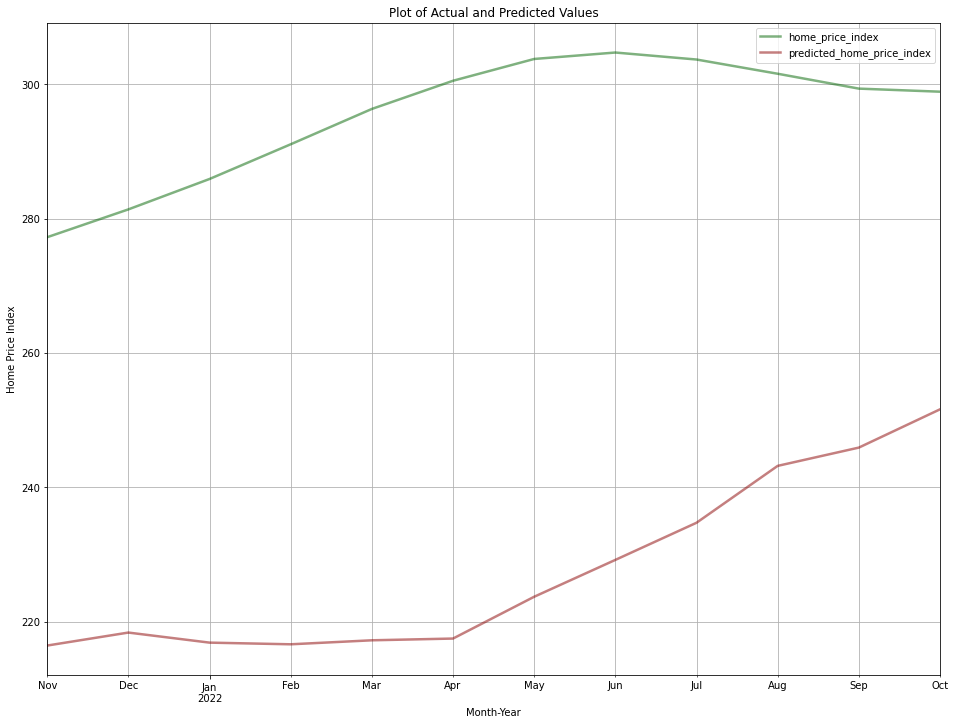

In [62]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
test_data.csushpisa.plot(x = test_data.index, kind = 'line', color = 'darkgreen',label = 'home_price_index',linewidth=2.5,alpha = 0.5,grid = True)
test_data.predicted_csushpisa.plot(x = test_data.index, color = 'darkred',label = 'predicted_home_price_index',linewidth=2.5, alpha = 0.5,grid = True)
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Month-Year')              # label = name of label
plt.ylabel('Home Price Index')
plt.title('Plot of Actual and Predicted Values') # title = title of plot

# Show gridlines for minor ticks (every month)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.grid(which='minor', linewidth=0.5, color='gray')
plt.show()

**Ridge Regression**

In [63]:
ridge = GridSearchCV(Ridge(random_state=42), param_grid={'alpha': 10**np.linspace(4,
                                                                        -4, 100)},
                    scoring="neg_mean_squared_error", cv=5)
ridge.fit(X_train, y_train)

print("GridSearchCV: Best Hyperparameter alpha: ")
print(ridge.best_params_)

print('\n')

print("GridSearchCV: Best score: ")
print(ridge.best_score_)

print('\n')

print("Train set performance: ")
y_train_pred_ridge = predict(ridge, X_train, y_train)
print('\n')
print("Test set performance: ")
y_test_pred_ridge = predict(ridge, X_test, y_test)

GridSearchCV: Best Hyperparameter alpha: 
{'alpha': 1.3219411484660286}


GridSearchCV: Best score: 
-674.3351961940409


Train set performance: 
R2 score:  0.7933733924296777
RMSE:  13.940643531946966
mean_absolute_error:  9.629485261621403


Test set performance: 
R2 score:  -70.29457562379679
RMSE:  75.33318077910847
mean_absolute_error:  74.80807015917864


**Lasso Regression:**

In [64]:
lasso = LassoCV(n_alphas=100, cv=5)
lasso.fit(X_train, y_train)

print("LassoCV: Best hyperparameter alpha: ")
print(lasso.alpha_)

print('\n')

print("LassoCV: Best score: ")
print(lasso.score(X_train, y_train))

print('\n')

print("Test set performance: ")
y_test_pred_lasso = predict(lasso, X_test, y_test)

print('\n')

print("Training set performance: ")
y_train_pred_lasso = predict(lasso, X_train, y_train)

LassoCV: Best hyperparameter alpha: 
0.6331939763884995


LassoCV: Best score: 
0.7365111153108408


Test set performance: 
R2 score:  -77.45583367179233
RMSE:  79.02612400581688
mean_absolute_error:  78.67773842427535


Training set performance: 
R2 score:  0.7365111153108408
RMSE:  15.742396588688875
mean_absolute_error:  10.773652810161195


Tree-based models, such as decision trees and random forests, exhibited signs of overfitting on the dataset. As a result, the results obtained from these models are not included in the notebook. Overfitting occurs when a model fits the training data too closely, capturing noise and hindering its ability to generalize to new, unseen data. To maintain the integrity of the analysis, I have excluded the overfit tree-based model results from the final presentation.